In [2]:
from snownlp import SnowNLP
from snownlp import sentiment
import numpy as np
import pandas as pd
import jieba as jie #导入结巴分词，需要自行下载安装 # version 0.42.1
import gensim as gen  # version 4.2.0
import wordcloud

In [3]:
# from wordcloud import WordCloud
from gensim import corpora, models
import gensim


# 参数初始化
negfile = 'neg_cut.txt'
posfile = 'pos_cut.txt'
stoplist = 'stopwords.txt'

neg = pd.read_csv(negfile, encoding='utf-8', header=None)  # 读入数据
pos = pd.read_csv(posfile, encoding='utf-8', header=None)
stop = pd.read_csv(stoplist, encoding='utf-8', header=None, sep='tipdm', engine='python')

stop = [' ', ''] + list(stop[0])  # Pandas自动过滤了空格符，这里手动添加（在每条数据的开头加个空格）

neg[1] = neg[0].apply(lambda s: s.split(' '))  # 定义一个分割函数，然后用apply广播
neg[2] = neg[1].apply(lambda x: [i for i in x if i not in stop])  # 逐词判断是否停用词，思路同上

pos[1] = pos[0].apply(lambda s: s.split(' '))
pos[2] = pos[1].apply(lambda x: [i for i in x if i not in stop])

# 负面主题分析
neg_dict = corpora.Dictionary(neg[2])  # 建立词典
neg_corpus = [neg_dict.doc2bow(i) for i in neg[2]]  # 建立语料库
neg_lda = models.LdaModel(neg_corpus, num_topics=5, id2word=neg_dict)  # LDA模型训练
for i in range(5):
    print(neg_lda.print_topic(i))  # 输出每个主题
    
print("====================================================================")
# 正面主题分析
pos_dict = corpora.Dictionary(pos[2])
pos_corpus = [pos_dict.doc2bow(i) for i in pos[2]]
pos_lda = models.LdaModel(pos_corpus, num_topics=5, id2word=pos_dict)
for i in range(5):
    print(pos_lda.print_topic(i))  # 输出每个主题

0.009*"高速" + 0.007*"分" + 0.007*"路" + 0.006*"站" + 0.006*"段" + 0.005*"http" + 0.005*"cn" + 0.005*"t" + 0.005*"比赛" + 0.005*"方向"
0.033*"例" + 0.022*"病例" + 0.017*"日" + 0.015*"月" + 0.015*"新冠" + 0.013*"确诊" + 0.012*"疫情" + 0.011*"美国" + 0.008*"新增" + 0.008*"时"
0.020*"cn" + 0.020*"t" + 0.020*"http" + 0.009*"年" + 0.009*"月" + 0.009*"日" + 0.007*"工作" + 0.006*"2020" + 0.005*"中国" + 0.004*"浙江"
0.010*"年" + 0.009*"中国" + 0.007*"月" + 0.006*"公司" + 0.006*"市场" + 0.006*"2021" + 0.005*"发展" + 0.005*"企业" + 0.005*"疫苗" + 0.005*"日"
0.031*"t" + 0.030*"cn" + 0.030*"http" + 0.007*"视频" + 0.007*"说" + 0.006*"孩子" + 0.005*"岁" + 0.004*"中" + 0.004*"网友" + 0.004*"心"
0.038*"t" + 0.038*"cn" + 0.038*"http" + 0.005*"视频" + 0.005*"说" + 0.005*"近日" + 0.005*"男子" + 0.004*"发现" + 0.004*"民警" + 0.003*"网友"
0.017*"月" + 0.015*"日" + 0.011*"年" + 0.007*"公司" + 0.007*"http" + 0.007*"t" + 0.007*"cn" + 0.006*"亿元" + 0.005*"12" + 0.005*"2020"
0.017*"月" + 0.016*"日" + 0.010*"时" + 0.008*"高速" + 0.008*"交警" + 0.007*"贵阳" + 0.006*"小区" + 0.006*"车辆" + 0.005*"12" + 0

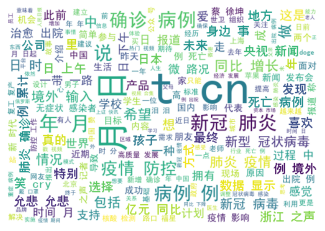

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei']
cloud_source = " ".join(neg[2].apply(lambda x: " ".join(x)))
font_path = './word/simhei.ttf' #使用中文字体文件
wc = WordCloud(background_color='white', width=500, height=350, max_font_size=80, min_font_size=4, mode='RGBA',font_path=font_path)
wc.generate(cloud_source)
plt.figure('negative')
plt.imshow(wc)
plt.axis('off')
plt.show()
# generate negative wordcloud

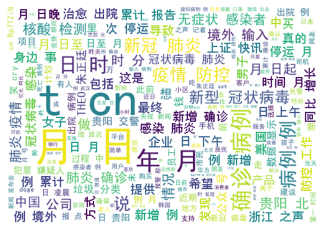

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud_source = " ".join(pos[2].apply(lambda x: " ".join(x)))
#font_path = '‪C:\Windows\Fonts\simhei.ttf'
font_path = './word/simhei.ttf'
wc = WordCloud(background_color='white', width=500, height=350, max_font_size=80, min_font_size=4, mode='RGBA', font_path=font_path)
wc.generate(cloud_source)
plt.figure('negative')
plt.imshow(wc)
plt.axis('off')
plt.show()
# generate positive wordcloud